In [32]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [33]:
df1 = pd.read_csv("matches_2008-2024.csv",low_memory=False)

In [34]:
df1.head()

,id,season,city,date,match_type,player_of_match,venue,Unnamed: 7,Unnamed: 8,team1,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2008,Bangalore,04/18/2008,League,BB McCullum,M Chinnaswamy Stadium,NaN,NaN,Royal Challengers Bangalore,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,04/19/2008,League,MEK Hussey,Punjab Cricket Association Stadium,Mohali,NaN,Kings XI Punjab,...,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2008,Delhi,04/19/2008,League,MF Maharoof,Feroz Shah Kotla,NaN,NaN,Delhi Daredevils,...,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,04/20/2008,League,MV Boucher,Wankhede Stadium,NaN,NaN,Mumbai Indians,...,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2008,Kolkata,04/20/2008,League,DJ Hussey,Eden Gardens,NaN,NaN,Kolkata Knight Riders,...,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


# **Basic Exploration**

In [35]:
# Matches were played in each city
df1['city'].value_counts()

,count
city,
Mumbai,173
Kolkata,93
Delhi,90
Chennai,85
Hyderabad,77
Bangalore,65
Chandigarh,61
Jaipur,57
Pune,51


In [36]:
# The average target score across all matches
Avg_target_score = df1['target_runs'].mean()
print('Average target score across all macthes:',round(Avg_target_score))

Average target score across all macthes: 166


In [37]:
# Matches won by each team
matches_won_each_team = df1.groupby(['team1']).agg({'winner':['count']})
print(matches_won_each_team)

                            winner
                             count
team1                             
Chennai Super Kings            128
Deccan Chargers                 39
Delhi Capitals                  41
Delhi Daredevils                84
Gujarat Lions                   16
Gujarat Titans                  21
Kings XI Punjab                 92
Kochi Tuskers Kerala             7
Kolkata Knight Riders          121
Lucknow Super Giants            22
Mumbai Indians                 123
Pune Warriors                   23
Punjab Kings                    31
Rajasthan Royals               101
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Royal Challengers Bangalore    132
Royal Challengers Bengaluru      9
Sunrisers Hyderabad             86


In [38]:
#player who won the most "Player of the Match" awards
player_of_the_match = df1['player_of_match'].value_counts().head(1)
print(player_of_the_match)

player_of_match
AB de Villiers    25
Name: count, dtype: int64


In [39]:
# Venue hosted the most matches
venue_hosted_most_matches = df1['venue'].value_counts().head(1)
print(venue_hosted_most_matches)

venue
Wankhede Stadium    118
Name: count, dtype: int64


# Statistics & **Aggregation**

In [40]:
# The mean, median, and standard deviation of result_margin for matches won by runs
result_margin_runs = df1[df1['result'] == 'runs']['result_margin']
print('Mean of result_margin:',round(result_margin_runs.mean()))
print('Median of result_margin::',result_margin_runs.median())
print('Standard deviation of result_margin:',round(result_margin_runs.std()))

Mean of result_margin: 30
Median of result_margin:: 22.0
Standard deviation of result_margin: 27


In [41]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   int64  
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   Unnamed: 7       415 non-null    object 
 8   Unnamed: 8       46 non-null     object 
 9   team1            1095 non-null   object 
 10  team2            1095 non-null   object 
 11  toss_winner      1095 non-null   object 
 12  toss_decision    1095 non-null   object 
 13  winner           1090 non-null   object 
 14  result           1095 non-null   object 
 15  result_margin    1076 non-null   float64
 16  target_runs      1092 non-null   float64
 17  target_overs  

In [42]:
# The correlation between target_runs and result_margin (for matches won by runs only)
correlation = df1['target_runs'].corr(df1['result_margin'])
print(f"Correlation = {correlation:.2f}")

Correlation = 0.40


In [43]:
# Calculate the win percentage of each team.
win_percentage = (df1['winner'].value_counts() / len(df1)) * 100
print(win_percentage.map("{:,.2f}".format))

winner
Mumbai Indians                 13.15
Chennai Super Kings            12.60
Kolkata Knight Riders          11.96
Royal Challengers Bangalore    10.59
Rajasthan Royals               10.23
Sunrisers Hyderabad             8.04
Kings XI Punjab                 8.04
Delhi Daredevils                6.12
Delhi Capitals                  4.38
Deccan Chargers                 2.65
Gujarat Titans                  2.56
Punjab Kings                    2.19
Lucknow Super Giants            2.19
Gujarat Lions                   1.19
Pune Warriors                   1.10
Rising Pune Supergiant          0.91
Royal Challengers Bengaluru     0.64
Kochi Tuskers Kerala            0.55
Rising Pune Supergiants         0.46
Name: count, dtype: object


In [44]:
# Distribution of matches won by wickets vs. by runs
distribution_of_matches = df1['result'].value_counts()
print(distribution_of_matches)

result
wickets      578
runs         498
tie           14
no result      5
Name: count, dtype: int64


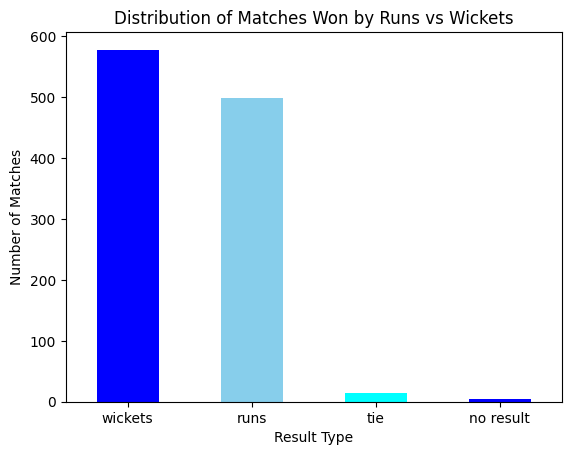

In [45]:
#Barplot
distribution_of_matches.plot(kind='bar', color=['blue', 'skyblue','cyan'])
plt.title('Distribution of Matches Won by Runs vs Wickets')
plt.xlabel('Result Type')
plt.ylabel('Number of Matches')
plt.xticks(rotation=0)
plt.show()

In [52]:
# Finding significant difference in the average target score when the toss decision is "bat" vs "field"
%pip install scipy
from scipy import stats

target_by_toss = df1.groupby('toss_decision')['target_runs'].mean().reset_index()
print(round(target_by_toss))

toss_decision_bat = df1[df1['toss_decision'] == 'bat']['target_runs'].dropna()
toss_decision_field = df1[df1['toss_decision'] == 'field']['target_runs'].dropna()
t_stat, p_value = stats.ttest_ind(toss_decision_bat, toss_decision_field)
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.2f}")

  toss_decision  target_runs
0           bat        161.0
1         field        168.0
T-statistic: -3.73
P-value: 0.00


# Filtering & **Grouping**

In [55]:
# Number of matches went into a super over
super_over = df1[df1['super_over'] == 'Y']
print("Number of matches went into super over:",len(super_over))

Number of matches went into super over: 14


In [68]:
#Which umpires have officiated the most matches together (umpire1 & umpire2 pair)?
umpires = df1.groupby(['umpire1', 'umpire2']).size().reset_index(name='count').sort_values(by='count', ascending=False).head(8)
print(umpires)

             umpire1        umpire2  count
398           S Ravi      RJ Tucker     12
40      AK Chaudhary    Nitin Menon     11
93         Asad Rauf       S Asnani     11
206  HDPK Dharmasena      CK Nandan     11
27      AK Chaudhary    CB Gaffaney     10
39      AK Chaudhary       NJ Llong     10
119     BNJ Oxenford  C Shamshuddin      9
395           S Ravi  C Shamshuddin      9


In [72]:
# The match with the highest result margin (by runs or wickets).
highest_result_margin = df1.loc[df1['result_margin'].idxmax()]
print(highest_result_margin)

id                          1082635
season                         2017
city                          Delhi
date                     05/06/2017
match_type                   League
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
Unnamed: 7                      NaN
Unnamed: 8                      NaN
team1              Delhi Daredevils
team2                Mumbai Indians
toss_winner        Delhi Daredevils
toss_decision                 field
winner               Mumbai Indians
result                         runs
result_margin                 146.0
target_runs                   213.0
target_overs                   20.0
super_over                        N
method                          NaN
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 620, dtype: object


In [75]:
# Which toss decision (bat/field) led to more wins?
toss_decision_wins = df1.groupby('toss_decision')['winner'].value_counts()
print(toss_decision_wins)

toss_decision  winner                     
bat            Chennai Super Kings            63
               Mumbai Indians                 54
               Kolkata Knight Riders          50
               Rajasthan Royals               43
               Royal Challengers Bangalore    37
               Sunrisers Hyderabad            30
               Delhi Daredevils               29
               Kings XI Punjab                24
               Deccan Chargers                14
               Delhi Capitals                 13
               Gujarat Titans                  9
               Pune Warriors                   9
               Lucknow Super Giants            6
               Punjab Kings                    4
               Gujarat Lions                   2
               Rising Pune Supergiants         2
               Royal Challengers Bengaluru     1
field          Mumbai Indians                 90
               Kolkata Knight Riders          81
               Royal Chall

In [88]:
# Teams have the highest win ratio when winning the toss
toss_winner_wins = df1.groupby('toss_winner')['winner'].size().sort_values( ascending=False)
print(toss_winner_wins)

toss_winner
Mumbai Indians                 143
Kolkata Knight Riders          122
Chennai Super Kings            122
Rajasthan Royals               120
Royal Challengers Bangalore    113
Sunrisers Hyderabad             88
Kings XI Punjab                 85
Delhi Daredevils                80
Delhi Capitals                  50
Deccan Chargers                 43
Punjab Kings                    24
Gujarat Titans                  22
Pune Warriors                   20
Lucknow Super Giants            19
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Royal Challengers Bengaluru      8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: winner, dtype: int64
